In [1]:
# step1 unnecessary warnings during code exucution
import warnings
warnings.filterwarnings('ignore')

#step2 import pandas and numoy library
import pandas as pd
import numpy as np

# deciding decimal places
np.set_printoptions(precision=4, linewidth=100)

#matplot library for display data in graphical format
import matplotlib.pyplot as plt

In [2]:
#step3 importing datafile and storing it  into pandas dataframe(always)
stock_df = pd.read_csv('finance1.csv')
stock_df.head(10)

,Date,wipro,nestle,Nifty
0,01-Apr-20,414.15,17165.20,8253.80
1,03-Apr-20,418.10,17165.00,8083.80
2,07-Apr-20,403.90,16571.75,8792.20
3,08-Apr-20,399.65,16170.10,8748.75
4,09-Apr-20,411.00,16448.10,9111.90
5,13-Apr-20,415.50,16681.35,8993.85
6,15-Apr-20,414.45,16588.05,8925.30
7,16-Apr-20,410.50,16450.85,8992.80
8,17-Apr-20,410.15,16201.25,9266.75
9,20-Apr-20,419.65,16455.75,9261.85


In [3]:
#step4 information of data
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    249 non-null    object 
 1   wipro   249 non-null    float64
 2   nestle  249 non-null    float64
 3   Nifty   249 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


Text(0, 0.5, 'nestle')

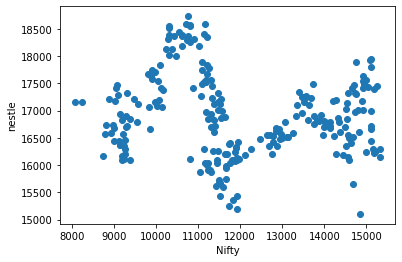

In [4]:
#step5 importing libraries for plotting the data (first assumption of LR model is linearity bet x and y)
plt.scatter(stock_df['Nifty'],stock_df['nestle'])
plt.xlabel('Nifty')
plt.ylabel('nestle')

In [5]:
#step6 importing statsmodel
import statsmodels.api as sm

# step 7 x is defined as independent variable (feature)
X=sm.add_constant(stock_df['Nifty'])
X.head(5)

,const,Nifty
0,1.0,8253.80
1,1.0,8083.80
2,1.0,8792.20
3,1.0,8748.75
4,1.0,9111.90


In [6]:
# step8 Y is defined as dependent varaible (target variable)
y=stock_df['nestle']

In [7]:
# step 9 importing library sklearn from ML model
from sklearn.model_selection import train_test_split

In [8]:
# step 10 splitting dataset into train and test data
train_X,test_X,train_y,test_y = train_test_split(X,y,train_size=0.8,random_state=100)

In [9]:
# step 11 fitting liner model equation
nestle_lm = sm.OLS(train_y,train_X).fit()

In [10]:
#STEP12 PRINTING RESULT OF LINEAR REGRESSION MODEL
print(nestle_lm.params)

const    17445.368486
Nifty       -0.047406
dtype: float64


In [11]:
# step 13 summary of all the statistics of linear regression
nestle_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 nestle   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     2.998
Date:                Fri, 28 Jan 2022   Prob (F-statistic):             0.0849
Time:                        17:23:06   Log-Likelihood:                -1599.3
No. Observations:                 199   AIC:                             3203.
Df Residuals:                     197   BIC:                             3209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.745e+04    331.573     52.614      0.000    1.68e+04    1.81e+04
Nifty         -0.0474      0.027     -1.732      0.085      -0.101       0.007
==============================================================================
Omnibus:                        3.349   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.187   Jarque-Bera (JB):                2.978
Skew:                           0.215   Prob(JB):                        0.226
Kurtosis:                       2.582   Cond. No.                     7.53e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
# step 14  importing libraries for plotting the data
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline


In [13]:
# step 15 importing libraries for plotting the data
get_ipython().run_line_magic('matplotlib','inline')

<Figure size 864x576 with 0 Axes>

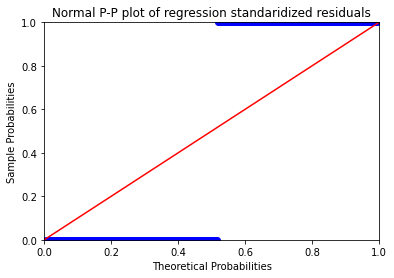

In [14]:
#step16 check for normal distribution of error
nestle_resid = nestle_lm.resid
probplot = sm.ProbPlot(nestle_resid)
plt.figure(figsize=(12,8))
probplot.ppplot(line='45')
plt.title("Normal P-P plot of regression standaridized residuals")
plt.show()
#strighht line indicats cummilative normal distribution
#dotted line indicates cummilative distribution of erros
# dots are closer to the straight line which indicates the res follows normdis

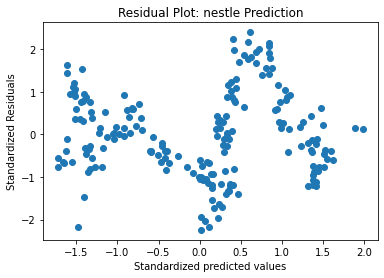

In [15]:
# Step 17 Test of Homoscedasticity
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter( get_standardized_values( nestle_lm.fittedvalues ),
    get_standardized_values( nestle_resid ) )
plt.title( "Residual Plot: nestle Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");


In [16]:
#step18 oulier predicition using z score
from scipy.stats import zscore

In [17]:
stock_df['z_score_nestle'] = zscore(stock_df.nestle)

In [18]:
stock_df[(stock_df.z_score_nestle>3.0)| (stock_df.z_score_nestle< -3.0)]

,Date,wipro,nestle,Nifty,z_score_nestle


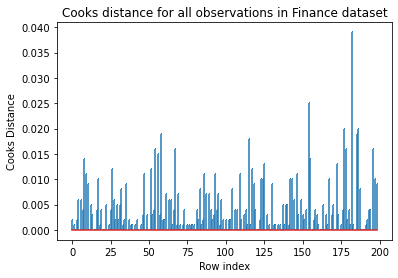

In [19]:
# Step 19    Outlier Detection using cook distance #
import numpy as np
nestle_influence = nestle_lm.get_influence() 
(c, p) = nestle_influence.cooks_distance 
plt.stem( np.arange( len(train_X) ), 
np.round( c, 3), 
markerfmt=","); 
plt.title("Cooks distance for all observations in Finance dataset"); 
plt.xlabel("Row index") 
plt.ylabel("Cooks Distance");


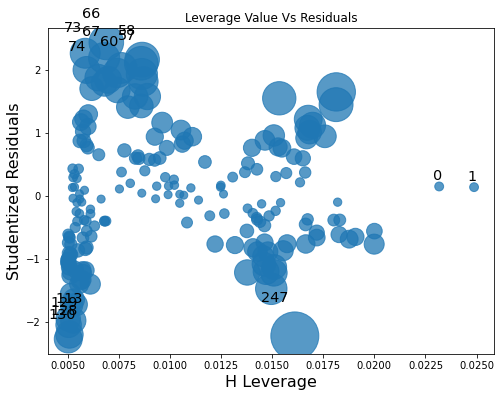

In [20]:
# Step 20    Outlier Detection using Leverage #
from statsmodels.graphics.regressionplots import influence_plot 
fig, ax = plt.subplots( figsize=(8,6)) 
influence_plot(nestle_lm, ax = ax) 
plt.title("Leverage Value Vs Residuals") 
plt.show();


In [21]:
# step 21 predicting on validation set
pred_y = nestle_lm.predict(test_X)

In [22]:
# Step 22  Strength of relatinship using R Square and error #
#Finding R-Square and RMSE#
from sklearn.metrics import r2_score, mean_squared_error


In [23]:
np.abs(r2_score(test_y,pred_y))

0.018286164970250596

In [24]:
import numpy as np

In [25]:
#finding root mean square error
np.sqrt(mean_squared_error(test_y,pred_y))

741.6595901230943

In [26]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std 
# Predict the y values
pred_y = nestle_lm.predict(test_X ) 
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( nestle_lm,test_X,alpha = 0.1) 
# Store all the values in a dataframe
pred_y_df = pd.DataFrame({'Nifty Closing': test_X['Nifty'], 
'pred_y': pred_y, 
'pred_y_left': pred_y_low, 
'pred_y_right': pred_y_high })


In [27]:
pred_y_df[0:10]

,Nifty Closing,pred_y,pred_y_left,pred_y_right
65,10813.45,16932.746412,15685.889073,18179.603752
59,10430.05,16950.921861,15703.226482,18198.617240
194,14484.75,16758.704879,15507.661949,18009.747809
112,11440.05,16903.041832,15657.035345,18149.048319
192,14137.35,16775.173713,15525.471655,18024.875770
169,13258.55,16816.834078,15569.645719,18064.022437
152,12631.10,16846.578953,15600.411932,18092.745974
203,14371.90,16764.054643,15513.468790,18014.640495
214,15109.30,16729.097481,15475.151961,17983.043001
173,13478.30,16806.416616,15558.718019,18054.115214
